# Create 4-col tsv readable text from 4-col tsv full content file
* The input should be a tsv table with url, end_url, binary, full-content
* The output will then be a file with url, end_url, length-readable-text, readable-text

In [214]:
# UTIL function, open a standard 4 column tsv output and return a list of dictionaries
# arguments:
# source_file: string, path to 4 column tsv, (url, end_url, binary, full_text)
# returns: list<dict(url,end_url,binary,description)>
import classification.data_extraction_functions as de
import os
print os.getcwd()

base_name = "language_englishuk"
source_file = 'temp/{}.csv'.format(base_name)
target_file = 'temp/{}_visible.tsv'.format(base_name)

def open_filter_file(source_file, target_name):
    ret_list = []
    with open(source_file, 'r') as source, open(target_name, 'w') as target:
        for line in source:
            url, end_url, binary, full_text = line.split('\t')
            visible_text = de.get_visible_text(full_text.replace('evaluate_content_for_200s: ', '').strip())
            len_visible = len(visible_text.split(' '))
            target.write('\t'.join(
            [
                url,
                end_url,
                str(len_visible),
                str(visible_text.encode('ascii', 'ignore').decode('ascii'))
            ]))
            target.write('\n')

import csv
import sys
csv.field_size_limit(sys.maxsize)
def open_csv_file(source_file, target_name):
    ret_list = []
    with open(source_file, 'r') as source, open(target_name, 'w') as target:
        sourcereader = csv.reader(source)
        for row in sourcereader:
            try:
                url, end_url, binary, full_text = row[0], row[1], row[2], row[3]
                #print url
                visible_text = de.get_visible_text(full_text.replace('evaluate_content_for_200s: ', '').strip())
                len_visible = len(visible_text.split(' '))
                target.write('\t'.join(
                [
                    url,
                    end_url,
                    str(len_visible),
                    str(visible_text.encode('ascii', 'ignore').decode('ascii'))
                ]))
                target.write('\n')
            except:
                continue
            

csv_format = True
if csv_format:
    res_list = open_csv_file(source_file, target_file)
else:
    res_list = open_filter_file(source_file, target_file)
print "DONE"
                

/Users/efrainolivares/repos/url_classifier_develop/notebooks
DONE


# Take two visible text files and create map of xy word cross counts
* Open both files and gather all words in two separate lists.
* Create a dictionary of tuples containing counts for each word ex: "word":(x times in file 1, y times in file 2)

In [215]:
# source of interest should be source_2, which ends up on x axis <->
source_1 = "temp/language_german_visible.tsv"
source_2 = "temp/language_englishuk_visible.tsv"

from collections import defaultdict

word_dict = {}

# Helper function to extract all text from a single file
def get_dict_word_pairs(source_file2, source_file1, word_dict, ):
    for idx, source_file in enumerate([source_file1, source_file2]):
        with open(source_file, 'r') as source:
            for line in source:
                full_text = line.split('\t')[3]
                words = full_text.split(' ')
                for idx_word, word in enumerate(words):
                    try:
                        word_dict[word][idx] += 1
                    except:
                        word_dict[word] = [0,0]
                        word_dict[word][idx] += 1
                    if idx_word+1 < len(words):
                        try:
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])][idx] += 1
                        except:
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])] = [0,0]
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])][idx] += 1
                    if idx_word+2 < len(words):
                        try:
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])][idx] += 1
                        except:
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])] = [0,0]
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])][idx] += 1
         

get_dict_word_pairs(source_1, source_2, word_dict)
print "DONE, FOUND THIS MANY WORDS COUNTS:", len(word_dict)

            

DONE, FOUND THIS MANY WORDS COUNTS: 221295


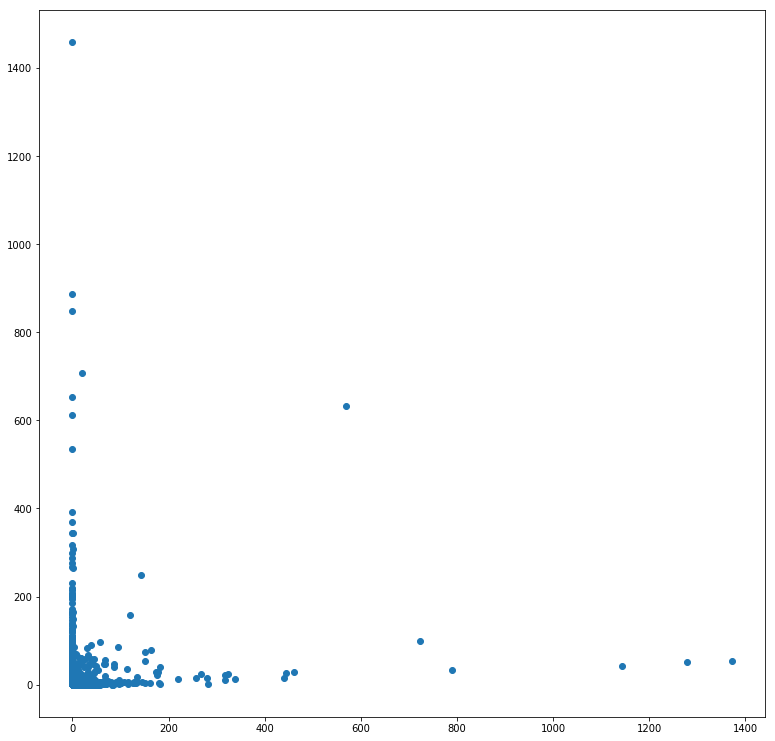

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

xarr = []
yarr = []
for word, xy_pair in word_dict.iteritems():
    xarr.append(xy_pair[0])
    yarr.append(xy_pair[1])
    

plt.figure(figsize = (13,13))
plt.scatter(xarr,yarr)
plt.show()

In [225]:
xmin = 50
xmax = 60000
ymin = 0
ymax = 50

final_list = []
for word, xy in word_dict.iteritems():
    if xy[0] <= xmax and xy[0] >= xmin and xy[1] <= ymax and xy[1] >= ymin:
        final_list.append( (word, xy))
final_list.sort(key=lambda x: x[1][0])
final_list.reverse()

display_filter = True

for item in final_list:
    if display_filter:
        print '        " {} ",'.format(item[0])
    else:

        print item

        " to ",
        " of ",
        " for ",
        " our ",
        " we ",
        " is ",
        " your ",
        " you ",
        " with ",
        " are ",
        " us ",
        " on ",
        " more ",
        " about ",
        " have ",
        " all ",
        " that ",
        " contact ",
        " it ",
        " by ",
        " can ",
        " or ",
        " of the ",
        " art ",
        " at ",
        " read ",
        " from ",
        " as ",
        " be ",
        " in the ",
        " new ",
        " business ",
        " this ",
        " view ",
        " work ",
        " out ",
        " what ",
        " will ",
        " find ",
        " contact us ",
        " has ",
        " team ",
        " support ",
        " read more ",
        " how ",
        " not ",
        " their ",
        " best ",
        " do ",
        " help ",
        " information ",
        " product ",
        " quality ",
        " if ",
        " up ",
        " wa

In [227]:

!. ../set_flag/return_full_text_on; echo ambientalbr.com.br | python ../bin/urlChecker.py | python ../classifier/classify.py > temp_file.tsv
with open("temp_file.tsv",'r') as source:
    for line in source:
        cols = line.split('\t')
        for col in cols:
            print col

----------
ambientalbr.com.br
#% starting script

processing input

ambientalbr.com.br
http://www.ambientalbr.com.br/
Foreign
106332
393
0
keywords marketing: []
0
keywords staffing: []
3
desc marketing: [u'r hr', u'post', u'7 temp']
2
desc staffing: [u'seo', u'marketing']
1
--marketing-- [u'marketing']
0
--staffing-- []
1
 --medical--  [u' home ']
15
 --portugese--  [u' em ', u' mais ', u' com ', u' os ', u' na ', u' um ', u' saiba ', u' saiba mais ', u' todos os ', u' contato ', u' site ', u' anos ', u' direitos ', u' quem ', u' porto ']
0
 --spanish--  []
0
 --dutch--  []
0
 --swedish--  []
0
 --french--  []
1
 --italian--  [u' sul ']
1
 --german--  [u' um ']
1
 --danish--  [u' os ']
0
 --turkish--  []
1
 --polish--  [u' na ']
0
 --norwegian--  []
0
 --czech--  []
3
--englishuk-- [u' as ', u' do ', u' site ']

